# 実践コンピュータビジョン
# 7章 画像検索
## 7.2 ビジュアルワード
テキストp.154

ukbenchの画像ライブラリについて特徴量を計算し、ビジュアルワードのボキャブラリ（VoBW）を作成する。  

### SIFT特徴量の計算
ライブラリ内のすべての画像について、SIFT特徴量を計算する。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [2]:
import imtools
import sift

In [3]:
# 画像ライブラリ(/first1000)のファイルパスのリスト
imlist = imtools.get_imlist('first1000')
imlist[0]

'first1000/ukbench00000.jpg'

In [4]:
nbr_images = len(imlist)
nbr_images

1000

### ukbenchデータセットの画像を表示する
ケンタッキー大学物体認識ベンチマークセットの最初の1000枚を画像ライブラリとする。<br>
ライブラリには4枚で1組の画像が含まれており、１枚の画像は縦480 x 横640 pixelで構成されている。

(480, 640, 3)


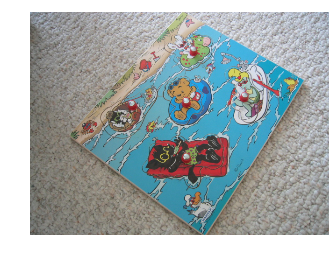

In [9]:
im0 = np.array(Image.open(imlist[0]))
print(im0.shape)
plt.imshow(im0)
plt.axis('off')
plt.show()

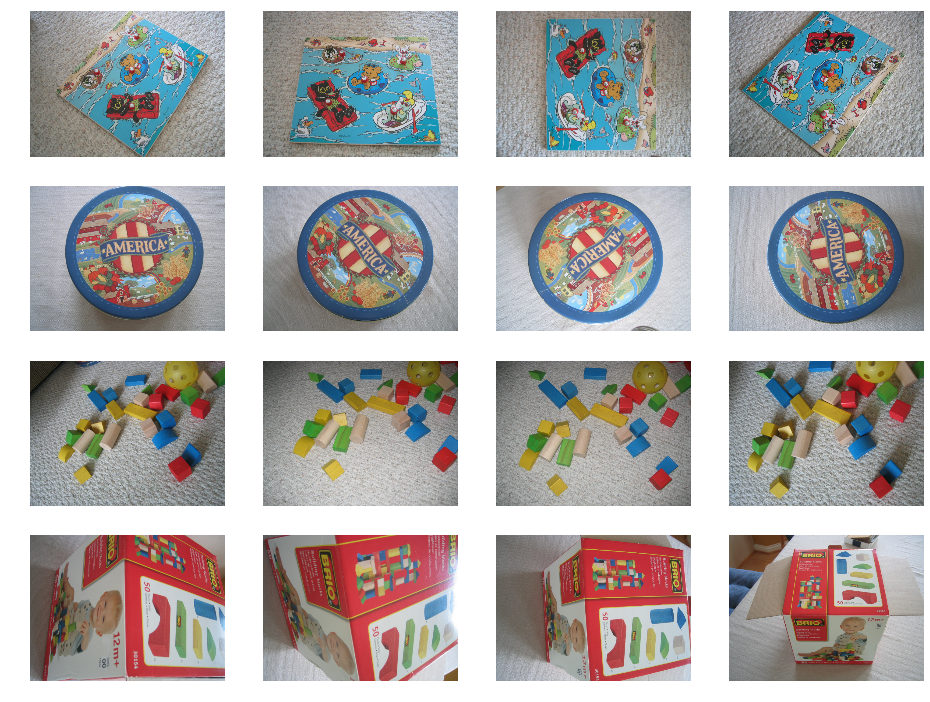

In [5]:
plt.figure(figsize=(16, 12))
for i, im in enumerate(imlist[:16]):
    plt.subplot(4,4,i+1)
    im = np.array(Image.open(im))
    plt.imshow(im)
    plt.axis('off')
plt.show()

In [4]:
# SIFT特徴量を保存するファイルパスのリスト
featlist = [ imlist[i][:-3]+'sift' for i in range(nbr_images)]
featlist[0]

'first1000/ukbench00000.sift'

In [5]:
# 画像のSIFT特徴量を計算して、ファイルに保存する
for i in range(nbr_images):
    sift.process_image(imlist[i],featlist[i])

processed tmp.pgm to first1000/ukbench00000.sift
processed tmp.pgm to first1000/ukbench00001.sift
processed tmp.pgm to first1000/ukbench00002.sift
processed tmp.pgm to first1000/ukbench00003.sift
processed tmp.pgm to first1000/ukbench00004.sift
processed tmp.pgm to first1000/ukbench00005.sift
processed tmp.pgm to first1000/ukbench00006.sift
processed tmp.pgm to first1000/ukbench00007.sift
processed tmp.pgm to first1000/ukbench00008.sift
processed tmp.pgm to first1000/ukbench00009.sift
processed tmp.pgm to first1000/ukbench00010.sift
processed tmp.pgm to first1000/ukbench00011.sift
processed tmp.pgm to first1000/ukbench00012.sift
processed tmp.pgm to first1000/ukbench00013.sift
processed tmp.pgm to first1000/ukbench00014.sift
processed tmp.pgm to first1000/ukbench00015.sift
processed tmp.pgm to first1000/ukbench00016.sift
processed tmp.pgm to first1000/ukbench00017.sift
processed tmp.pgm to first1000/ukbench00018.sift
processed tmp.pgm to first1000/ukbench00019.sift
processed tmp.pgm to

### ボキャブラリの作成
Vocabularyクラスのインスタンスを作成する

In [6]:
import pickle
import vocabulary

In [7]:
# Vocabularyインスタンスの生成
voc = vocabulary.Vocabulary('ukbenchtest')

In [8]:
# SIFT特徴量を読み込んで、ボキャブラリを学習する
# kmeans法を実行するので、処理時間がかかる
voc.train(featlist,1000,10)

In [9]:
# 名前
voc.name

'ukbenchtest'

### voc.voc
voc.vocはkmeans法で求めた画像ボキャブラリのクラスタをnumpy.array型で保持する。  
vocabulary.pyのtrain()メソッドの中で、scipy.cluster.vq.kmeans()で計算する。
```python
# k平均法：最後の数字で試行数を指定する
self.voc,distortion = kmeans(descriptors[::subsampling,:],k,1)
self.nbr_words = self.voc.shape[0]
```

参考サイト：Numpy & Scipy Documentation  
https://docs.scipy.org/doc/scipy-0.7.x/reference/cluster.vq.html

In [10]:
# 画像ボキャブラリのリスト
print(voc.voc.shape)
print(voc.voc[0])

(993, 128)
[   9.44594595   15.24324324    6.            8.75675676   35.5
   68.52702703   12.08108108    5.7027027    21.45945946   28.01351351
   10.18918919    6.5          38.97297297   86.27027027   17.95945946
    8.05405405   75.54054054   65.06756757   21.17567568    6.48648649
    9.13513514   22.82432432   10.5          24.04054054   30.67567568
   24.52702703   22.14864865   19.97297297   23.74324324   17.01351351
   10.91891892   17.43243243   13.60810811    7.45945946    1.41891892
    3.18918919   55.68918919  112.39189189   19.43243243    6.44594595
  104.01351351   86.56756757   29.52702703    6.12162162   18.24324324
   60.21621622   14.74324324   23.17567568   59.21621622   72.74324324
   61.2027027    35.77027027   19.56756757   12.95945946    8.55405405
   20.59459459   24.82432432   12.60810811   11.90540541   22.43243243
   41.62162162   42.16216216   18.56756757   24.13513514   21.35135135
   34.67567568   28.40540541   12.33783784   47.72972973   83.14864865
  

In [11]:
# IDF値
voc.idf.shape

(993,)

In [12]:
# 学習するSIFT特徴量ファイルのリスト
voc.trainingdata

['first1000/ukbench00000.sift',
 'first1000/ukbench00001.sift',
 'first1000/ukbench00002.sift',
 'first1000/ukbench00003.sift',
 'first1000/ukbench00004.sift',
 'first1000/ukbench00005.sift',
 'first1000/ukbench00006.sift',
 'first1000/ukbench00007.sift',
 'first1000/ukbench00008.sift',
 'first1000/ukbench00009.sift',
 'first1000/ukbench00010.sift',
 'first1000/ukbench00011.sift',
 'first1000/ukbench00012.sift',
 'first1000/ukbench00013.sift',
 'first1000/ukbench00014.sift',
 'first1000/ukbench00015.sift',
 'first1000/ukbench00016.sift',
 'first1000/ukbench00017.sift',
 'first1000/ukbench00018.sift',
 'first1000/ukbench00019.sift',
 'first1000/ukbench00020.sift',
 'first1000/ukbench00021.sift',
 'first1000/ukbench00022.sift',
 'first1000/ukbench00023.sift',
 'first1000/ukbench00024.sift',
 'first1000/ukbench00025.sift',
 'first1000/ukbench00026.sift',
 'first1000/ukbench00027.sift',
 'first1000/ukbench00028.sift',
 'first1000/ukbench00029.sift',
 'first1000/ukbench00030.sift',
 'first1

In [13]:
voc.nbr_words

993

In [14]:
# ボキャブラリを保存する
with open('vocabulary.pkl', 'wb') as f:
    pickle.dump(voc,f)
print('vocabulary is:', voc.name, voc.nbr_words)

vocabulary is: ukbenchtest 993
